## Student Info

* Student name 1: Trần Huỳnh Hương
* Student ID 1: 20120099

* Student name 2: Võ Thành Phong
* Student ID 2: 20120547

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1_ID2.ipynb` (e.g. `19123_19456.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score

**Some important notes:**
- My team has created some new cells and functions during the installation process to clarify the declarations and ensure clean source code.
- **To avoid issues when the tree does not have any pure leaf nodes, determining the class of a sample will be based on the class with a higher number of instances in the leaf node (This method is called 'Majority voting').** (This is why the value of a leaf node is displayed in dictionary format when visualizing the tree.)
- **If a sample in the test set has attributes that do not belong to any branch of the tree, then determining the class of that sample will be based on the node of the branch that has the most matching number of attributes with the sample.**
- My team coincidentally discovered that if we split the original titanic2 dataset using train_test_split with random_state=520, then X_test[148] will be a sample that does not belong to any branch of the tree. Furthermore, this sample has a unique set of attribute values in the entire original dataset.

In [2]:
#NEW CELL TO IMPORT TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split

In [3]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    # YOUR CODE HERE
    columns_name=[]
    data=[]
    with open(file_path) as f:
        columns_name=f.readline().split()
        lines=f.readlines()
        data=[[{columns_name[i]:l.split()[i]} for i in range(len(l.split()))] for l in lines]
    n=np.array(data)
    X=n[:,:-1]
    y=n[:,-1]
    y=np.array([list(i.values())[0] for i in y])
    if split==False:
        return X,y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=520)
        return X_train, y_train, X_test, y_test
    #raise NotImplementedError()

In [4]:
#NEW CELL TO IMPLEMENT COMPUTING ENTROPY FUNCTIONS
def entropy(n_samples_of_each_class, n_samples):
    """
    Parameters:
    -----------
    n_samples_of_each_class: list number of samples in each class
    n_samples: number of data samples
    
    -----------
    return entropy 
    """
    temp=[-(i/n_samples)*np.log2(i/n_samples) for i in n_samples_of_each_class]
    temp=np.array(temp)
    return temp.sum()

def entropy_of_one_division(division): 
    """
    Division: list labels of samples after splited by specified value of current attribute.
    Returns
    ----------
    entropy of a group of samples after splited by specified value of current attribute.
    n_samples:number of samples of a group of samples after splited by specified value of current attribute.
    n_classes: classes that all samples in group is belonged to.
    n_samples_each_class: number of samples in each classes.
    """
    n_samples = len(division)
    n_classes = set(division)
    
    n_samples_each_class=[]
    #count samples in each class then store it to list n_samples_each_class
    
    for i in n_classes:
        count=0
        for j in division:
            if i==j:
                count+=1
        n_samples_each_class.append(count)
    
    return entropy(n_samples_each_class,n_samples),n_samples, list(n_classes), n_samples_each_class

In [5]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 

class DecisionTree:
    def __init__(self):
        # YOUR CODE HERE
        self.depth=0 #depth of completed decision tree.
        self.tree=None #completed decision tree.
        self.columns_name=None #stored names of all columns in the dataset.
        #raise NotImplementedError()

    def fit(self, X_train, y_train):
        # 3
        # YOUR CODE HERE
        self.columns_name=[list(i.keys())[0] for i in X_train[0]]
        self.build_tree(X_train, y_train)
        #raise NotImplementedError()
       
    def build_tree(self,X_train, y_train, node={}, traced=[], depth=0):
        '''Parameter:
        -----------------
        X_train: training data
        y_train: label of training data
        ------------------
        return: node 
        
        node: each node represented by att, purity, cutoff values, column index, it's value and it's children.
         - att: name of splited attribute of node.
         - purity: A list containing boolean variables for each value of the splited attribute to check
                   if after splited by this value the subgroup is purity?
         - isLeaf: A list containing boolean variables for each value of the splited attribute to check
                   if a current node is a leaf node?
         - cutoffs: values are values in the splited attributes.
         - index_col: column index is the index of the splited attributes.
         - val (value of node): A dict contains dictionaries that contain number of samples for each class
                                after splited by each value in the splited attribute.
        '''
        
        col_idx, cutoffs, entropy, labels, purity = self.find_best_split_of_all(X_train, y_train, traced) # find one split
        if col_idx==-1:
            return {'index_col':-1}
        if entropy==0:
            node = {'index_col':col_idx,
                    'att':self.columns_name[col_idx],
                    'cutoffs':cutoffs,
                    'purity':purity,
                    'isLeaf': [True for _ in range(len(cutoffs))],
                    'val':labels}
            return node

        else:  
            node = {'index_col':col_idx,
                    'cutoffs':cutoffs,
                    'att':self.columns_name[col_idx],
                    'purity':purity,
                    'isLeaf': [],
                    'val':labels}
            node['sub_tree']={}
            for i in range(len(cutoffs)):
                if node.get('purity')[i]==False:
                    value=cutoffs[i]
                    X_new=X_train[X_train[:, col_idx] == value]
                    y_new=y_train[X_train[:, col_idx] == value]
                    node['sub_tree'][tuple(value.items())] = self.build_tree(X_new, y_new, {}, traced+[col_idx], depth+1)
                    if node['sub_tree'][tuple(value.items())]['index_col']==-1:
                        node['isLeaf'].append(True)
                    else:
                        node['isLeaf'].append(False)    
                else:
                    node['isLeaf'].append(True)
            self.depth += 1 
            self.tree = node
            return node
        
    def find_best_split_of_all(self, X, y, traced):
        col_idx = -1
        min_entropy = 82 #just a random number and it's my birthday ^_^
        cutoffs = None
        labels=None
        purity=None
        for i, col_data in enumerate(X.T):
            if i in traced:
                continue
            entropy, cur_cutoffs, cur_labels, cur_purity = self.split(col_data, y)
            if entropy == 0: #best entropy
                return i, cur_cutoffs, entropy, cur_labels, cur_purity
            elif entropy <= min_entropy:
                min_entropy = entropy
                col_idx = i
                cutoffs = cur_cutoffs
                labels=cur_labels
                purity=cur_purity
                
        return col_idx, cutoffs, min_entropy, labels, purity
    
    def split(self, col_data, y):
        ''' 
        Parameters:
        -------------
        col_data: data samples in column
        
        Returns:
        -------------
        entropy: entropy of a group of samples after splited by specified value of current attribute.
        cutoffs: values in the splited attributes.
        '''
        
        entropy = 0.0
        cutoffs=set(frozenset(c.items()) for c in col_data)
        cutoffs=[dict(c) for c in cutoffs]
        labels=[]
        purity=[]
        
        for value in cutoffs:
            y_predict = col_data == value
            component_entropy, n, n_classes, n_samples_each_class = entropy_of_one_division(y[y_predict])
            entropy+=((n/len(y))*component_entropy)
            if component_entropy==0.0:
                purity.append(True)
            else:
                purity.append(False)
            temp={}
            for i in range(len(n_classes)):
                temp[n_samples_each_class[i]]=n_classes[i]
            labels.append(temp)
        return entropy, cutoffs, labels, purity
    
    def predict(self, X_test):
        # 0.5
        # YOUR CODE HERE
        tree = self.tree
        pred = ['' for _ in range(len(X_test))]
        for i, c in enumerate(X_test):
            pred[i] = self._predict(c)
        return np.array(pred)
        #raise NotImplementedError()
    
    def _predict(self, row):
        cur_layer = self.tree
        return self.forward_prop(cur_layer, row) 

    def forward_prop(self,cur_layer, row, traced=[]):
        label=None
        index=-1
        for i in range(len(cur_layer.get('cutoffs'))):
            if row[cur_layer['index_col']] == list(cur_layer.get('cutoffs'))[i]:
                index=i
                max_count_class=max(k for k in list(cur_layer.get('val')[i].keys()))
                label=cur_layer.get('val')[i][max_count_class]
                if cur_layer.get('purity')[i]==True or cur_layer.get('isLeaf')[i]==True:
                    return label
                    
        if len(traced)>=1:
            return traced[-1]
        return self.forward_prop(cur_layer.get('sub_tree')[tuple(list(cur_layer.get('cutoffs'))[index].items())],row,traced+[label])
                    
                
    def visualize(self):
        # 0.5
        # YOUR CODE HERE
        cur_layer = self.tree
        self.forward_for_vs(cur_layer)
        #raise NotImplementedError()
    
    def forward_for_vs(self,layer,space=''):
        for i in range(len(layer.get('cutoffs'))):
            value=list(list(layer.get('cutoffs'))[i].values())[0]
            if layer.get('purity')[i]==True or layer.get('isLeaf')[i]==True:
                label=': '+str(layer.get('val')[i])
                print(space+layer.get('att')+' = '+value+label)
            else:
                print(space+layer.get('att')+' = '+value)
                self.forward_for_vs(layer.get('sub_tree')[tuple(list(layer.get('cutoffs'))[i].items())],space+'|'+2*' ')

In [6]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/tennis.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train)
acc_train = accuracy_score(y_train, y_hat_train)
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
print('Accuracy on training set: ',acc_train*100,'%')
print('Accuracy on test set: ',acc_test*100,'%')
print('\nVisualization of trained tree:\n')
tree.visualize()

Accuracy on training set:  100.0 %
Accuracy on test set:  33.33333333333333 %

Visualization of trained tree:

outlook = overcast: {3: 'yes'}
outlook = rain
|  wind = strong: {2: 'no'}
|  wind = weak: {3: 'yes'}
outlook = sunny: {3: 'no'}


In [7]:
tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/titanic2.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train)
acc_train = accuracy_score(y_train, y_hat_train)
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
print('Accuracy on training set: ',acc_train*100,'%')
print('Accuracy on test set: ',acc_test*100,'%')
print('\nVisualization of trained tree:\n')
tree.visualize()

Accuracy on training set:  77.8409090909091 %
Accuracy on test set:  76.64399092970523 %

Visualization of trained tree:

sex = female
|  pclass = 3rd
|  |  age = child: {12: 'yes', 13: 'no'}
|  |  age = adult: {60: 'yes', 68: 'no'}
|  pclass = crew
|  |  age = adult: {16: 'yes', 3: 'no'}
|  pclass = 2nd
|  |  age = child: {12: 'yes'}
|  |  age = adult: {63: 'yes', 11: 'no'}
|  pclass = 1st
|  |  age = adult: {115: 'yes', 4: 'no'}
sex = male
|  pclass = 1st
|  |  age = child: {5: 'yes'}
|  |  age = adult: {46: 'yes', 89: 'no'}
|  pclass = 2nd
|  |  age = child: {9: 'yes'}
|  |  age = adult: {9: 'yes', 126: 'no'}
|  pclass = crew
|  |  age = adult: {145: 'yes', 526: 'no'}
|  pclass = 3rd
|  |  age = child: {11: 'yes', 31: 'no'}
|  |  age = adult: {66: 'yes', 320: 'no'}


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*
- Accuracy on test set and train set are quite close and are at approximately 77%.
- These accuracy scores are not low but not really good enough to trust the classification of this decision tree. So my team looked at other metrics as precision, recall.

![image](https://res.cloudinary.com/vtphong/image/upload/v1682576241/data-mining/Screenshot_2023-04-27_131700.png)

- The recall is low on both the train and the test set, indicating that the tree is not classified well for samples of the positive class (or in this case, the class 'yes').
- Reasons are:
  + When statistics about the number of samples between the two classes, this dataset contains twice as many samples of class 'no' as there are samples of class 'yes', when tree construction is complete and leaf nodes that are not pure nodes then there will be a majority of leaf nodes with more samples of class 'no' than samples of class 'yes'.
  + Branches that produce leaf nodes are either pure leaf nodes for class 'yes' or contain a larger number of samples of class 'yes' generated with a small number of samples from the dataset.
  + There are also branches that exist only in one sex or one age, which also affect the classification of the tree if the splitting of the dataset reveals patterns in the test set that are not. belongs to any branch of the tree.
- **Propose a solution:** Using algorithms like **random forest** or **gradient boosting**, these techniques will combine many different decision trees and the sample will be finally classified based on **the weighted voting method**. Avoid bias in sample size and increase model stability with outliers.

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [9]:
seed = 520 # for reproducibility

In [10]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

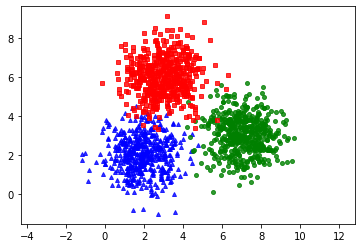

In [11]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [12]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)
    # randomly pick k rows of X as initial centers using np.random.choice function
    # YOUR CODE HERE
    return X[np.random.choice(X.shape[0], k, replace=False)]
    #raise NotImplementedError()

In [13]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [14]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin  
    # YOUR CODE HERE
    distances = cdist(X, centers)
    return np.argmin(distances, axis = 1)
    #raise NotImplementedError()

In [15]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [16]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average
        # YOUR CODE HERE
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
        #raise NotImplementedError()       
    return centers

In [17]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    # YOUR CODE HERE
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))
    #raise NotImplementedError()

In [18]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        labels.append(kmeans_assign_labels(X, centers[-1]))
        newcent = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], newcent):
            break
        centers.append(newcent)
        it = it + 1
        #raise NotImplementedError()  
    return (centers, labels, it)

Centers found by k-means algorithm:
[[2.96402177 6.01105837]
 [7.03594941 3.05108601]
 [1.92067563 2.03188976]]


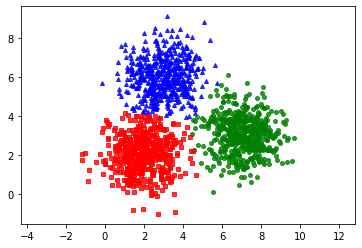

In [19]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

We can see that the K-means clustering algorithm works quite well, with the centers found to be quite close to the initial expectation. The points belonging to the same cluster are almost assigned to the same cluster (except for a few red points initially wrongly assigned to the blue cluster, but the proportion is small and acceptable).

**Question 3:** 

- **Drawbacks of K-means clustering algorithm (0.5)**

- **Propose solutions to the drawbacks you stated above (0.25)**

---

👉 Drawbacks of K-means clustering algorithm and solutions:
- Difficulty in predicting K (the number of clusters): It can be difficult to choose the optimal number of clusters (K) for a given dataset. Picking too many or too few clusters can lead to poor results. **SOLUTION: There are some methods that help determine the number of clusters such as Elbow method, Silhouette method, Cross-validation,...**
- Sensitive to scale: Since k-means clustering works by calculating the distance between data points and the size of centers of your clusters, it can be thrown off by situations where your variables have different scales. **SOLUTION: If one of your variables is on a much larger scale than the others, for example, that variable will have an outsized effect on the distance calculated. This means that you generally need to re-scale your data before using k-means clustering.**
- Struggles with high dimensional data: Like many other clustering algorithms, k-means clustering starts to struggle when many features are included in the model.**SOLUTION: If you have many potential features, you should cosider applying feature selection or dimensionality reduction algorithms to your data before creating your clusters.**
- Clustering outliers: Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. **SOLUTION: Consider removing or clipping outliers before clustering.**
- Sensitivity to initial value: K-means clustering is sensitive to the initial choice of cluster centers, which can lead to different solutions with different final cluster assignments. **SOLUTION: Running K-means clustering multiple times with different initial centers and select the method with the smallest final loss function value.**
- Assumes spherical density. One of the main disadvantages of k-means clustering is that it constrains all clusters to have a spherical shape. This means that k-means clustering does not perform as well in situations where clusters naturally have irregular shapes. This is a relatively strict assumption that is not made by all clustering algorithms.
